## Linear Regression

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Create known parameters:

weight = 0.7
bias = 0.3

# Create database:

start = 0
end = 1 
step = 0.02
X = np.arange(start, end, step)
y = weight*X + bias

In [70]:
print("First ten entries of X:\n", X[:10])

First ten entries of X:
 [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18]


In [71]:
print("First ten entries of y:\n",y[:10])

First ten entries of y:
 [0.3   0.314 0.328 0.342 0.356 0.37  0.384 0.398 0.412 0.426]


In [72]:
len(X), len(y)

(50, 50)

In [73]:
# Splitting the dataset

splitratio = int(0.8*len(X))

X_train, y_train = X[:splitratio], y[:splitratio]
X_test, y_test = X[splitratio:], y[splitratio:]

In [74]:
X_train.shape, y_train.shape

((40,), (40,))

In [75]:
def plot_data(train_data = X_train, 
              train_label = y_train,
              test_data = X_test,
              test_label = y_test,
              predictions = None
             ):
        plt.figure(figsize=(8,5))
        #PLot the training data and train labels
        plt.scatter(train_data, train_label, c='b', s=4, label='Training Data')
        #PLot the testing data and test labels
        plt.scatter(test_data, test_label, c='g', s=4, label='Testing Data')
        
        #Plot if we have a prediction:
        if predictions is not None:
            plt.scatter(test_data, predictions, c='r', s=4, label="Predicted Data")
            
        plt.legend(prop={'size':10})
        

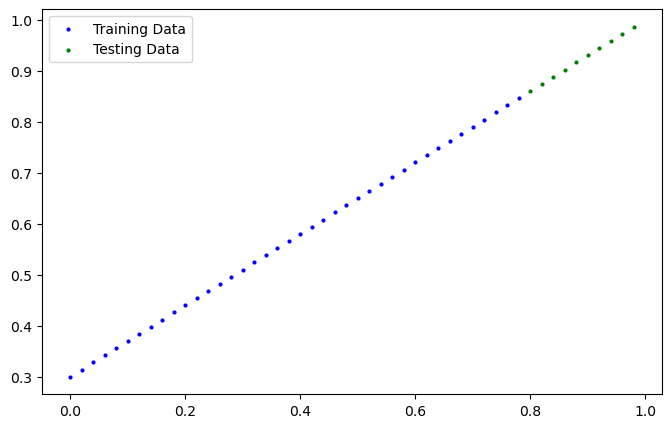

In [76]:
plot_data()

## BackPropagation

In [77]:
# Generating random values for w and b
w = np.random.randn(1)
b = np.random.randn(1)

In [78]:
w, b

(array([-1.37594821]), array([1.05182182]))

In [79]:
def loss_fn(y_actual, y_predicted):
    return np.sum(np.square(y_actual - y_predicted))/len(y_actual)


In [95]:
lr = 0.05
epochs= 500
loss_list = []
test_loss_list = []

for epoch in range(epochs):
    # Forward propagation
    y_pred = X_train*w + b
    
    # compute the loss
    loss = loss_fn(y_actual = y_train, y_predicted = y_pred)
    loss_list.append(loss)
    
    # compute the gradient wrt to w and b
    gradientW = (-2*np.sum((y_train-y_pred)*X_train))/len(X_train)
    gradientB = (-2*np.sum(y_train-y_pred))/len(X_train)
    
    # Backpropagation
    w = w - lr*gradientW
    b = b - lr*gradientB
    
    
    # compute the Test loss
    test_pred = X_test*w  + b
    test_loss = loss_fn(y_actual=y_test, y_predicted=test_pred)
    test_loss_list.append(test_loss)
    
    if epoch%10 == 0:
        print(f'Epoch = {epoch} | Training Loss = {loss:.5f} | Test Loss = {test_loss:.5f}')
        
    

Epoch = 0 | Training Loss = 0.00001 | Test Loss = 0.00005
Epoch = 10 | Training Loss = 0.00001 | Test Loss = 0.00005
Epoch = 20 | Training Loss = 0.00001 | Test Loss = 0.00004
Epoch = 30 | Training Loss = 0.00001 | Test Loss = 0.00004
Epoch = 40 | Training Loss = 0.00001 | Test Loss = 0.00003
Epoch = 50 | Training Loss = 0.00001 | Test Loss = 0.00003
Epoch = 60 | Training Loss = 0.00001 | Test Loss = 0.00003
Epoch = 70 | Training Loss = 0.00001 | Test Loss = 0.00003
Epoch = 80 | Training Loss = 0.00001 | Test Loss = 0.00002
Epoch = 90 | Training Loss = 0.00001 | Test Loss = 0.00002
Epoch = 100 | Training Loss = 0.00000 | Test Loss = 0.00002
Epoch = 110 | Training Loss = 0.00000 | Test Loss = 0.00002
Epoch = 120 | Training Loss = 0.00000 | Test Loss = 0.00002
Epoch = 130 | Training Loss = 0.00000 | Test Loss = 0.00002
Epoch = 140 | Training Loss = 0.00000 | Test Loss = 0.00001
Epoch = 150 | Training Loss = 0.00000 | Test Loss = 0.00001
Epoch = 160 | Training Loss = 0.00000 | Test Loss =

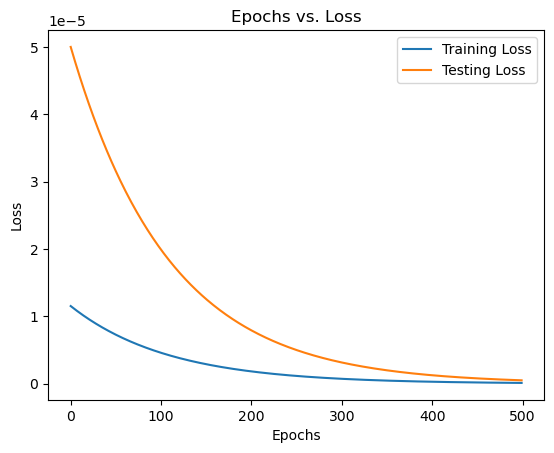

In [96]:
# Plotting the train and test loss

plt.plot(range(epochs), loss_list, label="Training Loss")
plt.plot(range(epochs), test_loss_list, label="Testing Loss")
plt.title("Epochs vs. Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

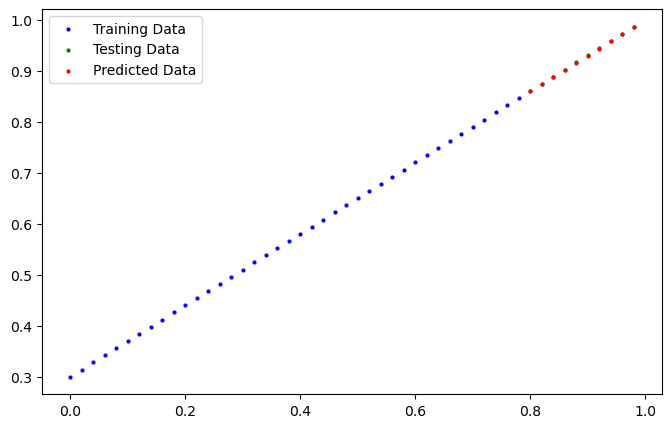

In [97]:
y_pred = X_test*w + b

plot_data(predictions= y_pred)

In [98]:
w

array([0.69853622])

In [99]:
b

array([0.30059838])